# Gaussian Mixture Models


In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=20, n_features=1, centers=2, cluster_std=1.8, random_state=40)


X_df = pd.DataFrame(X, columns=["Data"])
X_df["Group"] = pd.DataFrame(y)
X_df.head()


,Data,Group
0,-1.748928,0
1,-8.364390,1
2,-0.567779,0
3,-11.187650,1
4,-9.250896,1


<Axes: xlabel='Data'>

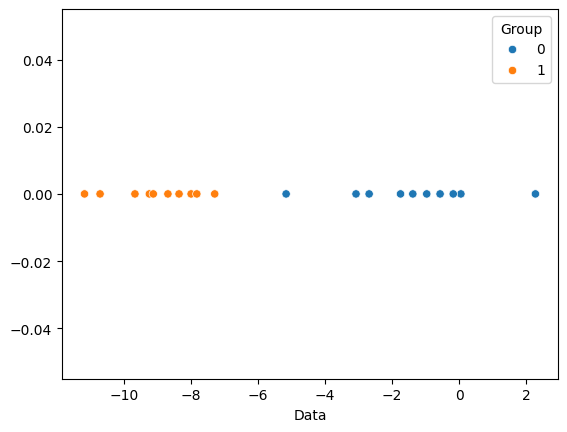

In [39]:
sns.scatterplot(x='Data', y=0, data=X_df, hue='Group')

<Axes: xlabel='Data', ylabel='Density'>

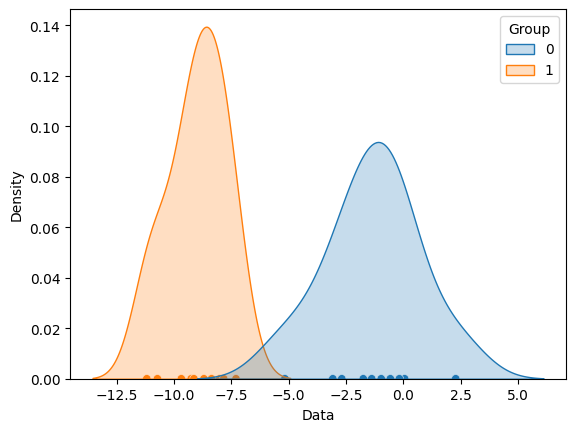

In [40]:
fig, ax = plt.subplots()

sns.scatterplot(data=X_df, x='Data', y=0, ax=ax, hue='Group')
sns.kdeplot(data=X_df, x='Data', fill=True, hue='Group')

Find the likelihood function for each data we get. 

But that's in 2D. 

When working in higher dimensions

$$2d = eq$$

Uses Co-Variance matrix (used in SVDs)

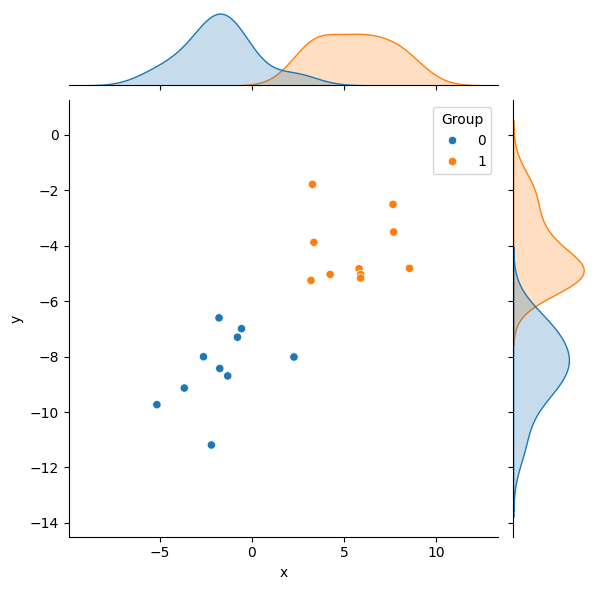

In [41]:
X,y = make_blobs(n_samples=20, n_features=2, centers=2, cluster_std=1.8, random_state=40)
X_df = pd.DataFrame(X, columns=["x","y"])
X_df['Group'] = pd.DataFrame(y)


sns.jointplot(data=X_df, x='x', y='y', hue='Group')

<Axes: xlabel='x', ylabel='y'>

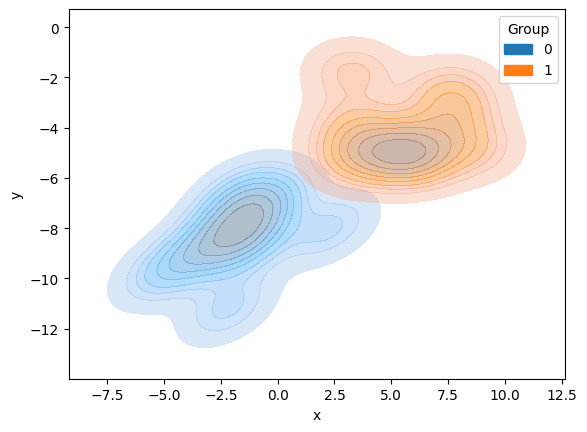

In [42]:
sns.kdeplot(data=X_df, x='x', y='y', hue='Group', fill=True, alpha=0.4)

Expected values: sum of all points times the probability of that point.    


E[x] = 1/4( -24, -4, +4, +26) = mean

You can find the variance for x and y. (which is x_bar - the mean)

var(x) = 425   

var(y) = 133.33  

covariance(x, y) = <x_bar, y_bar> / n - 1 
covariance(x, y) = dot_prod / 3 = 166.67

covariance matrix: 
```
[ 425     , 166.67
 166.67   , 133.33]
 ```

In [43]:
(-2.4, -12)
(-4, -12)
(-4, 8)
(26, 5)

(26, 5)

In [44]:
x = np.array([-24, -4, -4, 26])
y = np.array([-12, -12, 8, 8])

print(x.mean(), x - x.mean())
print(y.mean(), y - y.mean())

print(np.var(x, ddof=1), np.var(y, ddof=1))

print(np.cov(x, y, ddof=1))

-1.5 [-22.5  -2.5  -2.5  27.5]
-2.0 [-10. -10.  10.  10.]
425.0 133.33333333333334
[[425.         166.66666667]
 [166.66666667 133.33333333]]


### The GMM Algorithm (Hard Clustering)

1. Start with random Gaussian Curves
2. Then find the likelihood to each point of belonging into each group/cluster
3. assign each point to the most likely cluster (using gausian distribution)
4. Recalculate the gaussian curves based on the clusters made in steps 2 and 3
5. Repeat steps 2-4 until curves stop changing

*All points are weighted the same*

### The GMM Algorithm (Soft Clustering)
1. Start with random Gaussian Curves
2. Then find the likelihood to each point of belonging into each group/cluster
3. Normalize the lielihoods of each cluster (these are the weights, you normalize the weights to make it so they add up to 1)
4. Recalculate the gaussian curves based on the __weighted__ clusters made in steps 2 and 3
5. Repeat steps 2-4 until curves stop changing

*Points have probabilities of being in different groups.*  
*Expected value changes because now they have different weights*


In [45]:
x = np.array([-24, -4, -4, 26])
y = np.array([-12, -12, 8, 8])
w = np.array([.4,.8,.7,1])

print(w/w.sum()) #  normalizing weights 
print((x*w).sum() / w.sum()) # expected values x
print((y*w).sum() / w.sum()) # expected values x


# algorithm


[0.13793103 0.27586207 0.24137931 0.34482759]
3.5862068965517233
-0.27586206896551807


[[40  0  0  0  0]
 [ 0  0 39  1  0]
 [ 8  5  1 26  0]
 [ 0 39  0  0  1]
 [ 0  4  1  0 35]]


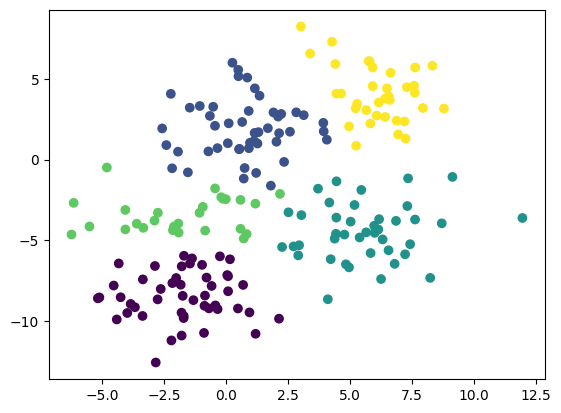

In [46]:

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix

X,y = make_blobs(n_samples=200, n_features=2, random_state=40, centers=5, cluster_std=1.8)

## Model

k = 5 # number of clusters
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=k,   # how many clusters we have
                      n_init=10,
                      random_state=40)        # creates 10 models and choose the one that is best

# Fit and Predict
y_pred = gmm.fit_predict(X)

print(confusion_matrix(y, y_pred))

plt.scatter(X[:,0], X[:,1], c=y_pred)

# Evaluation: there really isn't a RIGHT answer, we just want to group the data according to proximity

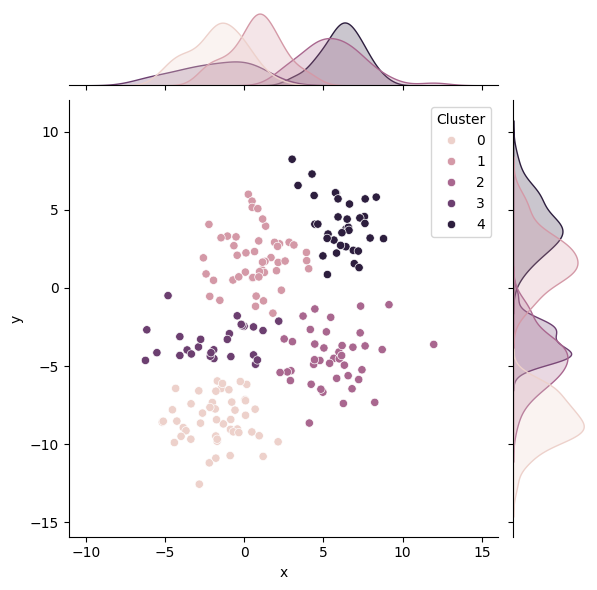

In [47]:
dataset = pd.DataFrame(X, columns=["x","y"])
dataset["Cluster"] = y_pred

sns.jointplot(data=dataset, x="x", y='y', hue='Cluster')

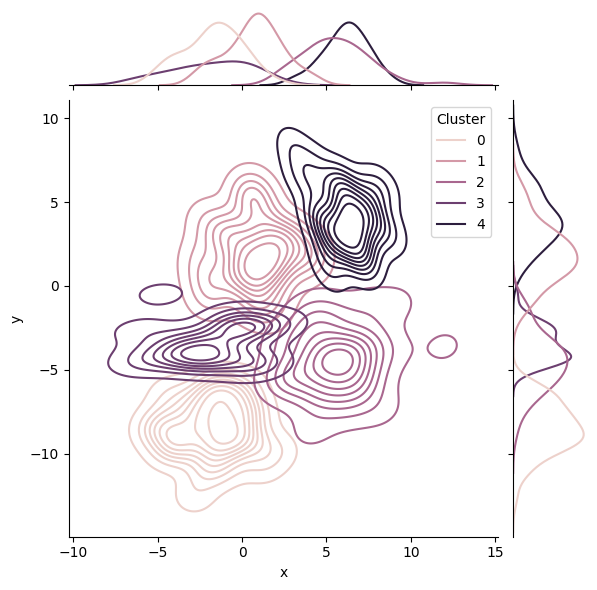

In [48]:
sns.jointplot(data=dataset, x="x", y='y', hue='Cluster', kind='kde')


<Axes: xlabel='x', ylabel='y'>

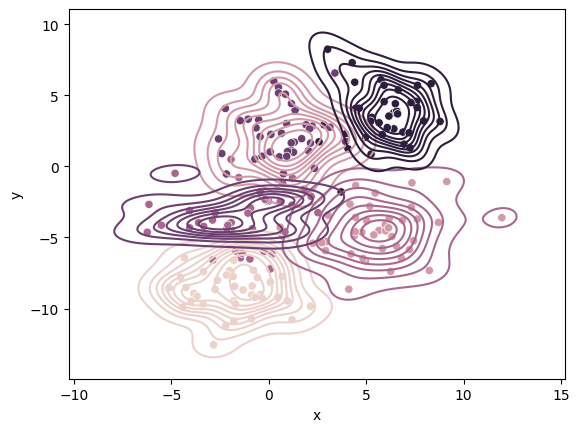

In [50]:
fig, ax = plt.subplots()
sns.kdeplot(data=dataset, x='x', y='y', hue='Cluster', ax=ax, legend=False)
sns.scatterplot(data=dataset, x='x', y='y', hue=y, ax=ax, legend=False)